In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost



In [14]:
#attrition = pd.read_csv('/Users/rishikapatwa/Downloads/summeranalytics2020/train.csv')

train_data = pd.read_csv("/Users/rishikapatwa/Downloads/summeranalytics2020/train.csv",index_col= "Id")
test_data = pd.read_csv("/Users/rishikapatwa/Downloads/summeranalytics2020/test.csv",index_col= "Id")

X = train_data.drop(['Attrition'],axis='columns').copy()
y = train_data["Attrition"].copy()
X_test = test_data.copy()

In [15]:
X.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Id,,,,,,,,,,,,,,,,,,,,,
1,30,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,...,3,0,12,2,11,7,6,7,4,1
2,36,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,...,3,2,7,2,3,2,1,1,2,1
3,55,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,...,3,0,12,3,9,7,7,3,5,1
4,39,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,...,3,0,18,2,7,7,1,7,4,1
5,37,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,...,3,1,10,2,10,7,7,8,1,1


In [16]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3,random_state=0)


In [17]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical columns:")
print(object_cols)

# Get list of numerical variables
numerical_cols = [cname for cname in X_train.columns if 
                X_train[cname].dtype in ['int64', 'float64']]

print("\nNumerical columns:")
print((numerical_cols))

Categorical columns:
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

Numerical columns:
['Age', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill', 'Behaviour']


In [20]:
X_train.nunique()

Age                         43
BusinessTravel               3
Department                   3
DistanceFromHome            29
Education                    5
EducationField               6
EmployeeNumber             758
EnvironmentSatisfaction      4
Gender                       2
JobInvolvement               4
JobRole                      9
JobSatisfaction              4
MaritalStatus                3
MonthlyIncome              725
NumCompaniesWorked          10
OverTime                     2
PercentSalaryHike           15
PerformanceRating            2
StockOptionLevel             4
TotalWorkingYears           39
TrainingTimesLastYear        7
YearsAtCompany              34
YearsInCurrentRole          19
YearsSinceLastPromotion     16
YearsWithCurrManager        17
CommunicationSkill           5
Behaviour                    1
dtype: int64

In [21]:
X_train.drop(['Behaviour'],inplace=True,axis='columns')
X_valid.drop(['Behaviour'],inplace=True,axis='columns')
X_test.drop(['Behaviour'],inplace=True,axis='columns')

numerical_cols.remove("Behaviour")
print("Numerical Columns:")
print(numerical_cols)

Numerical Columns:
['Age', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill']


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



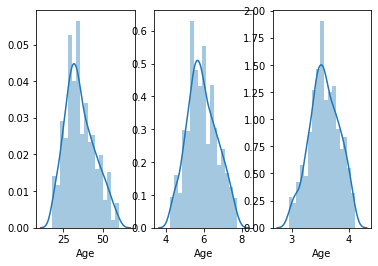

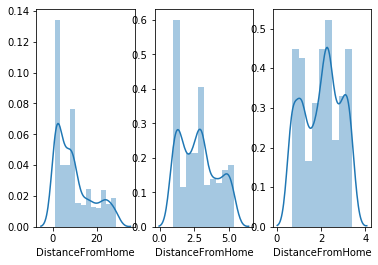

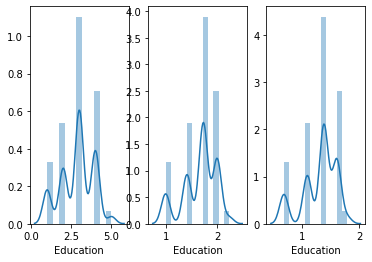

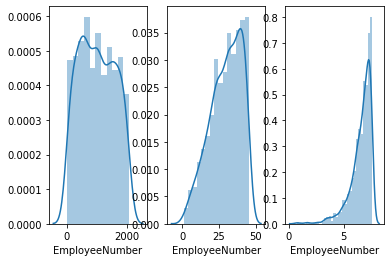

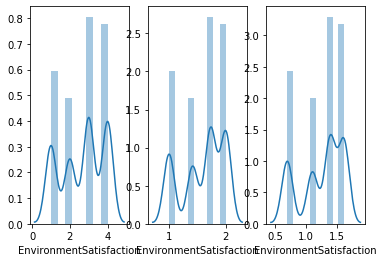

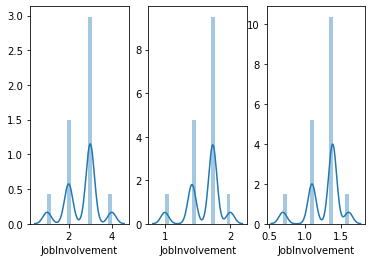

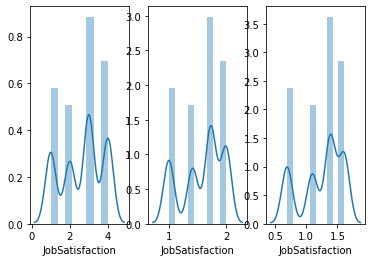

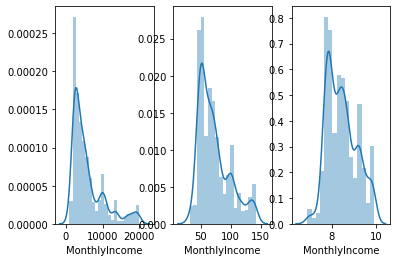

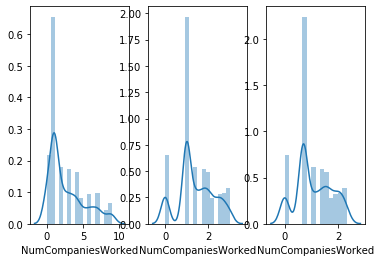

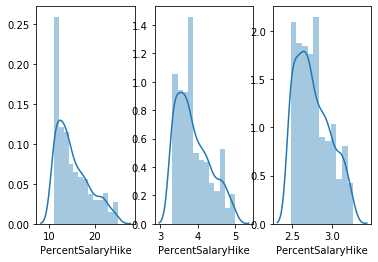

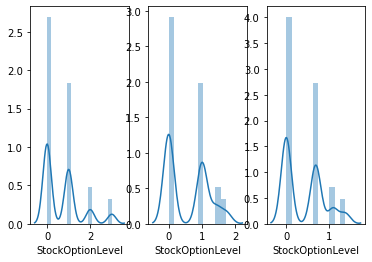

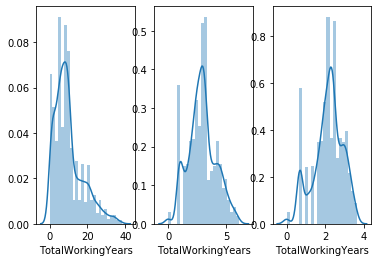

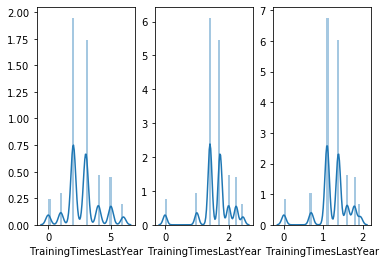

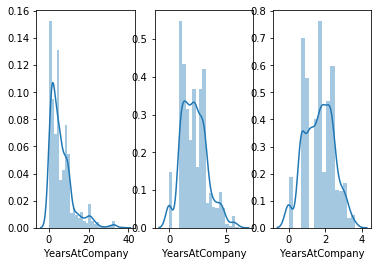

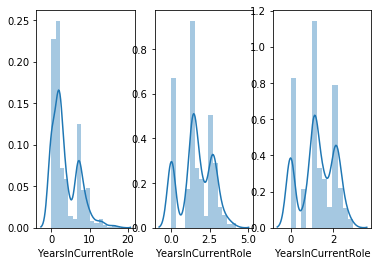

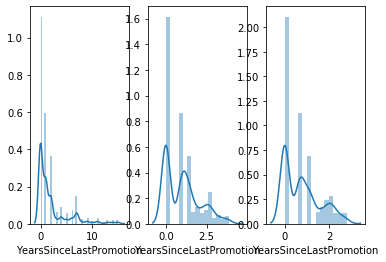

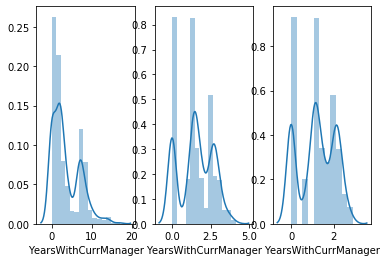

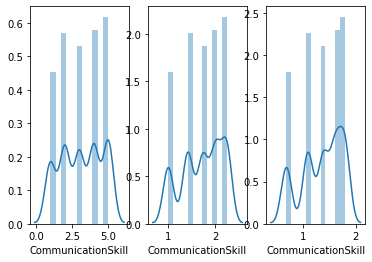

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline

#all numerical columns except performance rating because there was some error in producing it graph

cols = ['Age', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill']

for col in cols:
    fig,ax = plt.subplots(1,3)
    sns.distplot(X_train[col],ax=ax[0])
    sns.distplot(np.sqrt(X_train[col]),ax=ax[1])
    sns.distplot(np.log(X_train[col]+1),ax=ax[2])

why we transform data?

In [23]:
sqrt_col = ['DistanceFromHome','TotalWorkingYears','NumCompaniesWorked','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
log_col = ['MonthlyIncome','PercentSalaryHike']

X_train[sqrt_col] = np.sqrt(X_train[sqrt_col])
X_train[log_col] = np.log(np.log(X_train[log_col]))

X_valid[sqrt_col] = np.sqrt(X_valid[sqrt_col])
X_valid[log_col] = np.log(np.log(X_valid[log_col]))

X_test[sqrt_col] = np.sqrt(X_test[sqrt_col])
X_test[log_col] = np.log(np.log(X_test[log_col]))

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



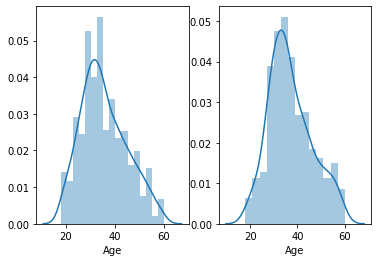

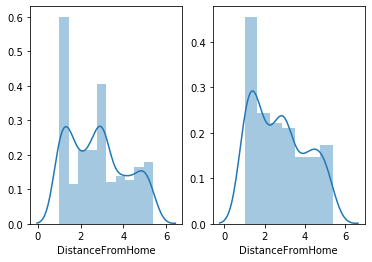

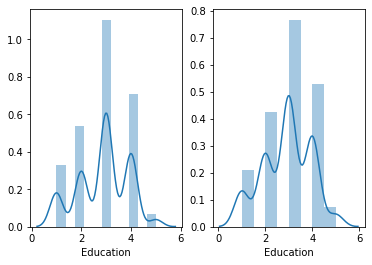

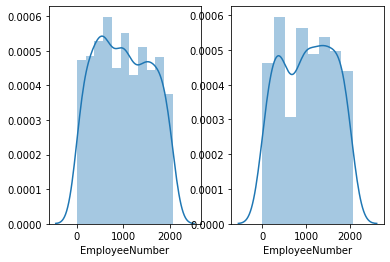

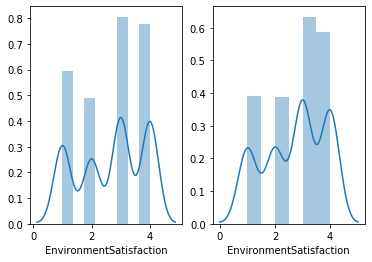

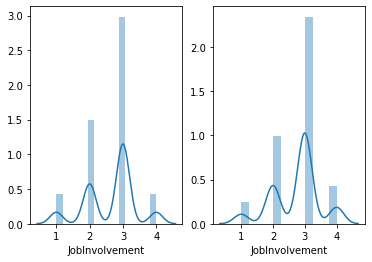

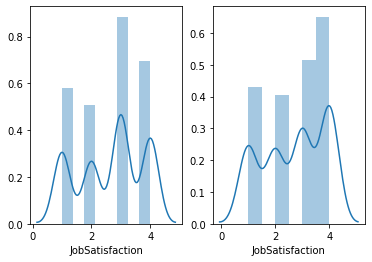

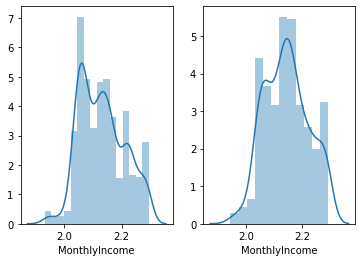

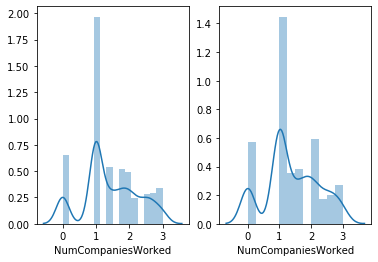

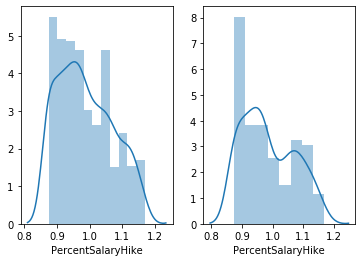

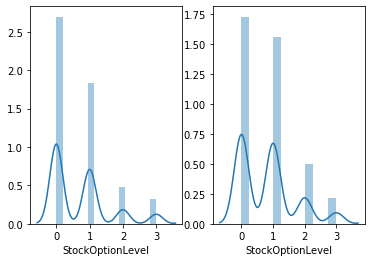

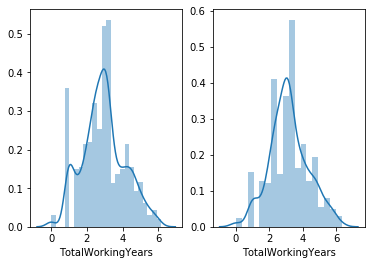

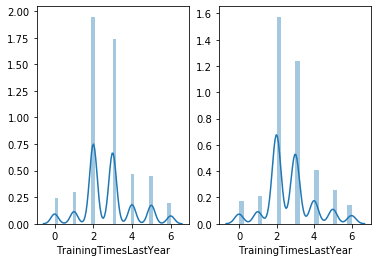

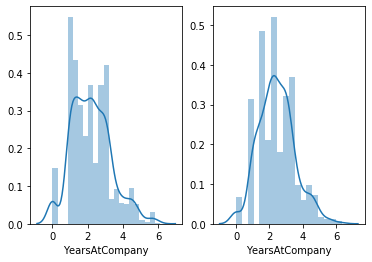

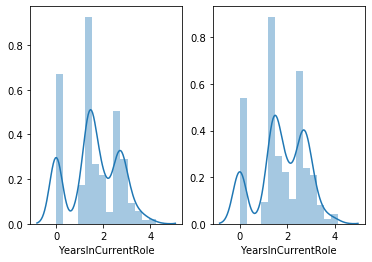

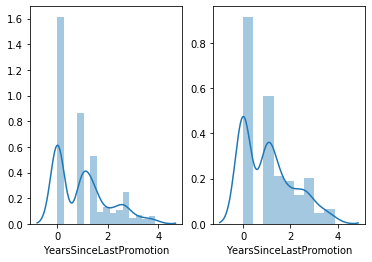

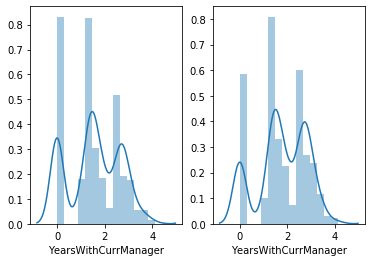

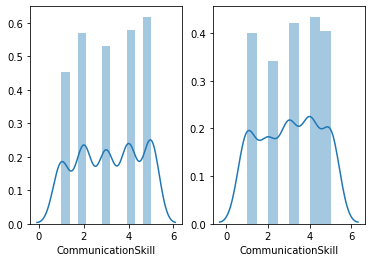

In [24]:
cols = ['Age', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill']

for col in cols:
    fig,ax = plt.subplots(1,2)
    sns.distplot(X_train[col],ax=ax[0])
    sns.distplot(X_test[col],ax=ax[1])

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.calibration import CalibratedClassifierCV

In [30]:
numerical_transformer = StandardScaler()

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False)),
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, object_cols),
    ])

model1 = LogisticRegression(random_state=0)
lrm = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model1)
])
grid_val1 = [
    {'model__penalty':['l2'],'model__tol':[0.001],'model__C':[1],'model__solver':['liblinear','saga','newton-cg','lbfgs'],'model__max_iter':[100]},
    {'model__penalty':['l1'],'model__tol':[0.001],'model__C':[1],'model__solver':['liblinear','saga'],'model__max_iter':[100]},
    {'model__penalty':['elasticnet'],'model__tol':[0.001],'model__C':[0.1],'model__solver':['saga'],'model__max_iter':[100],'model__l1_ratio':[0.25,0.5,0.75]},
]

'''model2 = DecisionTreeClassifier(random_state=0)
dtm = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model2)
])
grid_val2 = [
    {'model__criterion':['gini','entropy'],'model__max_depth':[10],'model__max_features':['sqrt','log2','none']}
]

model3 = RandomForestClassifier(random_state=0)
rfcm = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model3)
])
grid_val3 = [
    {'model__criterion':['gini'],'model__max_depth':[6],'model__n_estimators':[20]}
]

model4 = SVC(random_state=0,probability=True)
svcm = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model4)
])
grid_val4 = [
    {'model__C':[0.1],'model__kernel':['poly'],'model__degree':[2],'model__gamma':[0.1],'model__tol':[0.01]}
]
model5 = XGBClassifier(random_state=0)
xgbcm = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model5)
])
grid_val5 = [
    {'model__max_depth':[5],'model__objective':['binary:logistic'],'model__eval_metric':['auc'],'model__booster':['gblinear'],'model__learning_rate':[0.2]}
]

model6 = GaussianNB()
nbcm = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model6)
])
grid_val6 = [
    {'model__var_smoothing':[1e-09,1e-10,1e-08]}
]

model7 = CalibratedClassifierCV(LinearSVC(max_iter=1000000,random_state=0,loss='hinge'))
lsvcm = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model7)
])
grid_val7 =[
    {'model__method':['sigmoid']}
]

fm = GridSearchCV(lrm,param_grid = grid_val1,scoring = 'roc_auc')

fm.fit(X_train,y_train)

print(fm.best_params_)

y_valid_pred = fm.predict_proba(X_valid)[:,1]
y_train_pred = fm.predict_proba(X_train)[:,1]

print(roc_auc_score(y_train,y_train_pred))
print(roc_auc_score(y_valid,y_valid_pred))

y_test_pred = fm.predict_proba(X_test)[:,1]'''

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



{'model__C': 1, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'newton-cg', 'model__tol': 0.001}
0.8945261255909507
0.8595548862115127
